## Assignment - Evolutionary Computation

#### (Natural Computing, RU Nijmegen)

### Question 8: 


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math
import gplearn as gp
from gplearn import genetic

In [39]:
pop_size = 1000
n_gen = 50
crossover_p = 0.7
mutation_p = 0.
#function_set = (add, sub, mul, div, log, sin, cos, exp)

data = [(-1.0, 0.0000), (-0.9, -0.1629), (-0.8, -0.2624), (-0.7, -0.3129), 
        (-0.6, -0.3264),(-0.5, -0.3125), (-0.4, -0.2784), (-0.3, -0.2289), 
        (-0.2, -0.1664), (-0.1, -0.0909),(0.0, 0.0000), (0.1, 0.1111), 
        (0.2, 0.2496), (0.3, 0.4251), (0.4, 0.6496), (0.5, 0.9375),
        (0.6, 1.3056), (0.7, 1.7731), (0.8, 2.3616), (0.9, 3.0951), (1, 4.0000)]

X = np.reshape(np.transpose(data)[0],(-1,1))
Y = np.reshape(np.transpose(data)[1],(-1,1))

#Exponential function for function_set
def exponential_function(x):
    with np.errstate(over='ignore'):
        exponent = np.where(np.abs(x)<1000, np.exp(x), 0.)
        return exponent

exp = gp.functions.make_function(function=exponential_function, name='exp', arity=1)

#Fitness measure, absolute errors
def sum_abs_errors(x, x_p, w):
    return np.sum(np.abs(x-x_p))

sum_absolute_error = gp.fitness.make_fitness(sum_abs_errors, greater_is_better=False)

#Symbolic regressor
gp_sym_regr = gp.genetic.SymbolicRegressor(population_size=pop_size, generations = n_gen, 
                function_set =("add", "sub", "mul", "div", "log", "sin", "cos", exp), 
                metric = sum_absolute_error, p_crossover = crossover_p,
                p_subtree_mutation = mutation_p, p_hoist_mutation = mutation_p, 
                p_point_mutation = mutation_p, verbose=1, random_state=0)


In [40]:
gp_sym_regr = gp_sym_regr.fit(X,Y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.98      5.22308e+19        8          7.80165              N/A     33.25s
   1    12.05      8.24586e+11       15          4.14687              N/A     29.57s
   2    13.84      5.54901e+16       12          2.60606              N/A     29.19s
   3    15.04      2.40424e+12       30          1.46189              N/A     30.10s
   4    14.57      1.02526e+21       30          1.46189              N/A     31.11s
   5    14.54       7.3084e+18       30          1.46189    

In [41]:
#Results model
print("Function: ")
print(gp_sym_regr._program)
print("Sum absolute error:")
print(sum_abs_errors(Y, gp_sym_regr.predict(X),1.))

Function: 
sub(mul(div(sin(X0), exp(-0.813)), mul(mul(add(cos(div(0.068, exp(sin(div(exp(X0), exp(-0.813)))))), X0), exp(X0)), sin(add(-0.604, cos(div(0.068, exp(sin(div(exp(X0), exp(sin(div(exp(X0), add(-0.604, cos(0.068)))))))))))))), div(mul(div(X0, X0), div(0.068, cos(0.141))), exp(sin(div(X0, exp(sin(div(sin(X0), exp(sin(div(X0, exp(sin(div(sin(X0), exp(-0.813)))))))))))))))
Sum absolute error:
521.5770946004986


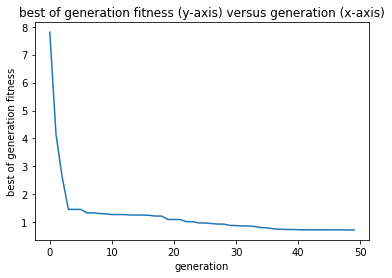

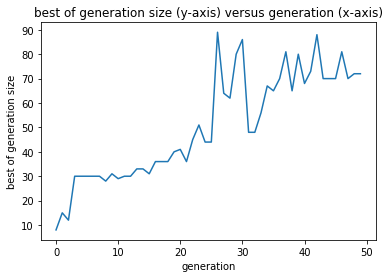

In [54]:
#Plots 

#https://gplearn.readthedocs.io/en/stable/reference.html#gplearn.genetic.SymbolicRegressor

plt.title("best of generation fitness (y-axis) versus generation (x-axis)")
plt.xlabel("generation")
plt.ylabel("best of generation fitness")
plt.plot(gp_sym_regr.run_details_['generation'], gp_sym_regr.run_details_['best_fitness'])
plt.show()

plt.title("best of generation size (y-axis) versus generation (x-axis)")
plt.xlabel("generation")
plt.ylabel("best of generation size")
plt.plot(gp_sym_regr.run_details_['generation'],gp_sym_regr.run_details_['best_length'])
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a99332b8-5d3d-47fa-8230-1d208927ff84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>